# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [1]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [2]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

Using a scatter plot to visualize the dataset

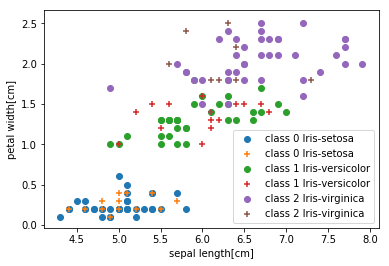

In [4]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])
    plt.scatter(X_test[y_test == i, 0],
                X_test[y_test == i, 1],
            marker='+',
            label='class '+ str(i)+ ' '+ iris_names[i])

# plt.xlabel('sepal width[cm]')
# plt.ylabel('petal length[cm]') // wrong name
plt.xlabel('sepal length[cm]')
plt.ylabel('petal width[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [5]:
def euclidean_distance(x1, x2):
  #### TO-DO #####          
    return np.sqrt((x1[0]-x2[0])**2 + (x1[1]-x2[1])**2) 
  ##############
    
def manhattan_distance(x1, x2):
    return (x1[0]-x2[0]) + (x1[1]-x2[1])

def cosine_distance(x1, x2):
    return (x1[0]*x2[0]+x1[1]*x2[1])/(np.sqrt(x1[0]**2+x1[1]**2)*np.sqrt(x2[0]**2+x2[1]**2))

In [20]:
def get_neighbors( X, y, x_test, k, distance=euclidean_distance):
  #### TO-DO #####  
    dis = []
    
    for i in range(len(y)):
        dis.append([i, distance(X[i], x_test), int(y[i])])
    
    # sort the distances from smallest to largest
    # add index of X_train, in order to solve a case as: 
    # if 2 points have the same distances with test point, I will choose the smaller index one
    dis.sort(key=lambda dis:dis[1])
    
    neighbors = dis[:k]
  ##############
    return neighbors

In [7]:
def predict(neighbors):
    labels = list(np.array(neighbors)[:,2])
    label = -1
    max_count = 0
    for l in labels:
        if labels.count(l) > max_count:
            max_count = labels.count(l)
            label = l
    return label

In [21]:
#### TO-DO #####
k = 5 # the value for k
y_pre = []
for x_test in X_test:
    neighbors = get_neighbors(X_train, y_train, x_test, k, distance=euclidean_distance)
    label = predict(neighbors)
    y_pre.append(label)


for i, label in enumerate(y_pre):
    if label != y_test[i]:
        print("when k = {}, the {} test data is wrong".format(k, i+1))

# calculate the accuracy
acc = 0.0
for pre, test in zip(y_pre, y_test):
    acc = acc + 1.0 if pre == test else acc
acc = acc/y_test.size

print("when k = {}, the accuracy is {}".format(k, acc))

when k = 5, the 11 test data is wrong
when k = 5, the 38 test data is wrong
when k = 5, the accuracy is 0.9473684210526315


In [26]:
# zero-R
label_counts = []
for i in range(len(set(y_test))):
    label_counts.append(np.sum(y_train == i))
most_label = np.argmax(label_counts) # get the index of the most common class
print("The most common class is {}".format(most_label))
# predict all the test dataset as the most common class
y_pre_zeroR = [most_label for _ in range(y_test.size)]

# calculate the accuracy
acc_zeroR = 0.0
for pre, test in zip(y_pre_zeroR, y_test):
    acc_zeroR = acc_zeroR + 1.0 if pre == test else acc_zeroR
acc_zeroR = acc_zeroR/y_test.size
print("when using zero-R, the accuracy is {}".format(acc_zeroR))

The most common class is 2
when using zero-R, the accuracy is 0.23684210526315788


In [33]:
# try manhattan_distance
k = 5 # the value for k
y_pre = []
for x_test in X_test:
    neighbors = get_neighbors(X_train, y_train, x_test, k, distance=euclidean_distance)
    label = predict(neighbors)
    y_pre.append(label)

# calculate the accuracy
acc = 0.0
for pre, test in zip(y_pre, y_test):
    acc = acc + 1.0 if pre == test else acc
acc = acc/y_test.size

print("when k = {}, the accuracy is {}".format(k, acc))

when k = 5, the accuracy is 0.9473684210526315


In [31]:
# try cosine_distance
k =  # the value for k
y_pre = []
for x_test in X_test:
    neighbors = get_neighbors(X_train, y_train, x_test, k, distance=euclidean_distance)
    label = predict(neighbors)
    y_pre.append(label)

# calculate the accuracy
acc = 0.0
for pre, test in zip(y_pre, y_test):
    acc = acc + 1.0 if pre == test else acc
acc = acc/y_test.size

print("when k = {}, the accuracy is {}".format(k, acc))

when k = 5, the accuracy is 0.9473684210526315


In [35]:
# 5-fold cross-validation
ks = [3, 7, 99]
cross_acc = []
for k in ks:
    all_acc = []
    for i in range(5):
        X_train_split = np.concatenate((X_train[:int(i*y_train.size/5)], X_train[int((i+1)*y_train.size/5):]), axis=0)
        y_train_split = np.concatenate((y_train[:int(i*y_train.size/5)], y_train[int((i+1)*y_train.size/5):]), axis=0)
        
        X_test_split = X_train[int(i*y_train.size/5):int((i+1)*y_train.size/5)]
        y_test_split = y_train[int(i*y_train.size/5):int((i+1)*y_train.size/5)]
        
        y_pre = []
        for x_test in X_test_split:
            neighbors = get_neighbors(X_train_split, y_train_split, x_test, k, distance=euclidean_distance)
            label = predict(neighbors)
            y_pre.append(label)

        # calculate the accuracy
        acc = 0.0
        for pre, test in zip(y_pre, y_test_split):
            acc = acc + 1.0 if pre == test else acc
        acc = acc/y_test_split.size
        all_acc.append(acc)
    cross_acc.append(np.mean(all_acc))
    
    print("The cross-validation accuracy for k={} is {}".format(k, np.mean(all_acc)))
# cross_acc = np.array(cross_acc)
best_k = ks[np.argmax(cross_acc)]
best_acc = cross_acc[np.argmax(cross_acc)]
print("When using euclidean distance, the best k should be {}, with the accuracy of {}".format(best_k, best_acc))

The cross-validation accuracy for k=3 is 0.9284584980237154
The cross-validation accuracy for k=7 is 0.9466403162055336
The cross-validation accuracy for k=99 is 0.18814229249011855
When using euclidean distance, the best k should be 7, with the accuracy of 0.9466403162055336
